In [44]:
#中心極限定理
import numpy as np

n = 100 #サンプルサイズ
N = 10000 #サンプル数
x = np.random.poisson(5, (N, n)) #poisson
print(x)

[[ 1  3  5 ...  4  7  7]
 [ 8  6  6 ...  4  4  5]
 [ 7  6  5 ...  5  2  7]
 ...
 [ 2  6  6 ...  7  5  5]
 [ 4  7  5 ...  5 11  2]
 [ 5  1  7 ...  8  6  9]]


In [45]:
x_bar = np.mean(x, axis = 1)
x_bar

array([5.03, 5.25, 4.64, ..., 4.96, 5.28, 5.19])

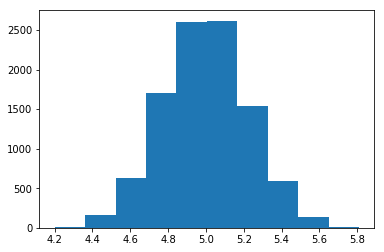

In [43]:
import matplotlib.pyplot as plt
plt.hist(x_bar)
plt.show()

# $t$検定

## $t$分布

$x_1,\ldots,x_n$が平均$\mu$、標準偏差$\sigma$の正規分布に独立に従うとする。
不偏分散
$$
s = \frac{1}{n-1}\sum_{i=1}^n(x_i-\overline{x})^2
$$
とし
$$
t = \frac{\overline{x}-\mu}{s/\sqrt{n}}
$$
は$t$分布と呼ばれる確率分布に従う。（$n$が大きければ正規分布に近づく）

## $t$の気持ち

平均$\mu$で標準偏差$\sigma$の正規分布に従う独立なサンプル$x_1, \ldots, x_n$の標本平均$\bar{x}$は、また正規分布に従う。（正規分布の再生性）

その平均と分散は
$$
E(\bar{x})
$$

$$
Var(\bar{x})
$$

となる。

従って、
$$
z = \frac{\overline{x}-\mu}{\sigma/\sqrt{n}}
$$
は標準正規分布に従う。

上の$t$は母標準偏差$\sigma$を標本の標準偏差$s$に置き換えたものである。

In [46]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [84]:
n = 10 #サンプルサイズ
mu = 0 #母平均
sigma = 1 #母標準偏差

N = 1000000 #サンプル数

sample = np.random.randn(N, n)
x_bar = np.mean(sample, axis = 1)
s = np.sqrt(np.sum((sample - x_bar.reshape(N,1)) ** 2, axis = 1) / (n - 1))
t = (x_bar - mu) / (s / math.sqrt(n))

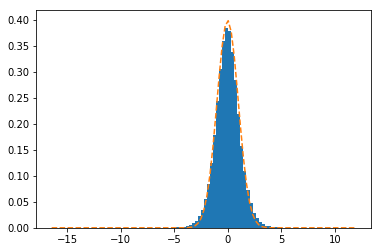

In [85]:
# https://matplotlib.org/gallery/statistics/histogram_features.html
fig, ax = plt.subplots()

num_bins = 100

# the histogram of the data
n, bins, patches = ax.hist(t, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)))
ax.plot(bins, y, '--')

#fig.tight_layout()
plt.show()

## 検定の考え方

帰無仮説を仮定する。
帰無仮説の下で、ある統計検定量はある確率分布に従うことがわかっている。

この量がある確率より低い確率でしか起こり得ない値になるとすると、帰無仮説の妥当性が低いと判断できる。

## t検定の考え方

データ$x_1, \ldots, x_n$が与えられたとき、その母平均が$0$であるかどうかを知りたいとしよう。

このデータが正規分布から独立に発生していると仮定する。
すると、上の式で計算した$t$の値は$t$分布に従っているはずである。

これを計算することで、確率的に判断を下そうというのが仮説検定の考え方。

## 手順

まず有意水準$\alpha$を決める。
多くは$\alpha = 0.05$だが、$0.01$や$0.1$も使われる。

あとで述べるように、これが検定で誤った結論を導く確率が決まる。

帰無仮説$H_0:\mu = \mu_0$

対立仮説の設定によって、両側検定と片側検定がある。
両側検定の対立仮説$H_1:\mu \neq \mu_0$
片側検定の対立仮説$H_1:\mu < \mu_0$または$\mu > \mu_0$

与えられた標本を元に、$t$統計量を計算する。

$t$分布に従って$p$値を計算する。
$t_\alpha$を両側検定なら$P(\lvert t\rvert>t_\alpha)=0.05$とし、片側検定なら$P(t<t_\alpha)=0.05$または$P(t>t_\alpha)=0.05$となるよう定める。
$p$が$\alpha$より小さければ帰無仮説棄却、そうでなければ対立仮説棄却。

## 第1種の誤りと第2種の誤り

第1種の誤りとは、帰無仮説$H_0$が正しいのに対立仮説$H_1$を採用してしまう誤りのこと。
これが起こる確率は有意水準と一致する。

第2種の誤りとは、対立仮説$H_1$が正しいのに帰無仮説$H_0$を採用してしまう誤りのこと。
これが起こる確率を検出力という。

二群の母平均の比較

二群に対応がある場合と対応がない場合。

対応がない場合に、二群の分散が等しい場合と等しくない場合で若干計算が異なる。

irisデータで種類毎の母平均の比較を行おう。

まずはデータの可視化から。
正規性などの確認。

In [59]:
from sklearn.datasets import load_iris
data = load_iris()

x = data.data[data.target == 0,0]
y = data.data[data.target == 1,0]

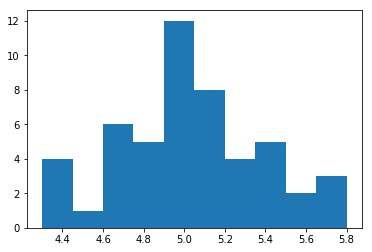

In [61]:
plt.hist(x)
plt.show()

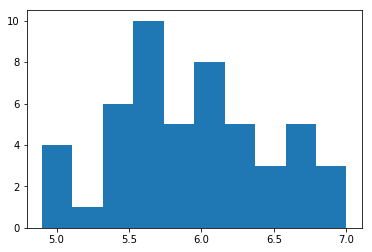

In [62]:
plt.hist(y)
plt.show()

In [64]:
s1, s2 = np.std(x), np.std(y)
t = (np.mean(x) - np.mean(y))/np.sqrt(s1**2/50 + s2**2/50)
print(t)

-10.6278010493636


実際には多クラス間の母平均の比較検定は行なってはいけない。
代わりに分散分析や多重比較という手法を用いる。

## $\chi^2$検定

自由度1の$\chi^2$分布。
標準正規分布に従う変数$X$について、$X^2$が従う分布

In [23]:
N = 10000

In [86]:
k = 1
sample = np.random.randn(N, k)
sample

array([[ 0.75405844],
       [-0.22773125],
       [-0.48118089],
       ...,
       [-0.71486711],
       [ 1.73808483],
       [ 0.59187239]])

In [87]:
xsq = np.sum(sample ** 2, axis = 1)
xsq

array([0.56860413, 0.05186152, 0.23153504, ..., 0.51103499, 3.02093889,
       0.35031292])

(array([7.04979e+05, 1.57169e+05, 6.83670e+04, 3.32190e+04, 1.70990e+04,
        8.84900e+03, 4.79900e+03, 2.52400e+03, 1.33800e+03, 7.39000e+02,
        4.08000e+02, 2.24000e+02, 1.09000e+02, 8.60000e+01, 4.10000e+01,
        2.20000e+01, 1.60000e+01, 4.00000e+00, 3.00000e+00, 5.00000e+00]),
 array([9.73529144e-14, 1.10037585e+00, 2.20075170e+00, 3.30112755e+00,
        4.40150341e+00, 5.50187926e+00, 6.60225511e+00, 7.70263096e+00,
        8.80300681e+00, 9.90338266e+00, 1.10037585e+01, 1.21041344e+01,
        1.32045102e+01, 1.43048861e+01, 1.54052619e+01, 1.65056378e+01,
        1.76060136e+01, 1.87063895e+01, 1.98067653e+01, 2.09071412e+01,
        2.20075170e+01]),
 <a list of 20 Patch objects>)

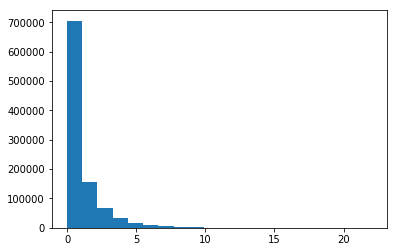

In [88]:
plt.hist(xsq, bins = 20)

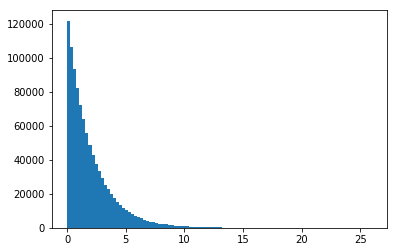

In [91]:
k = 2
xsq = np.sum(np.random.randn(N, k) ** 2, axis = 1)
plt.hist(xsq, bins = 100)
plt.show()

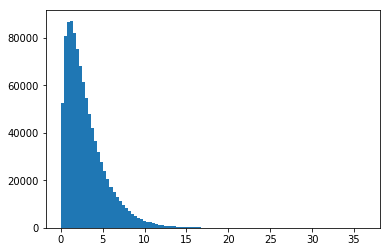

In [92]:
k = 3
xsq = np.sum(np.random.randn(N, k) ** 2, axis = 1)
plt.hist(xsq, bins = 100)
plt.show()

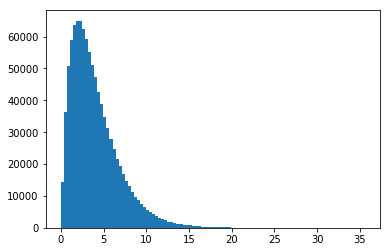

In [94]:
k = 4
xsq = np.sum(np.random.randn(N, k) ** 2, axis = 1)
plt.hist(xsq, bins = 100)
plt.show()

## 適合度検定

分布が理論分布に一致するか？を検定する。

例えばサイコロが均等であるか検定しよう。
理論分布は全て$1/6$である。

分類
実測値
理論値

帰無仮説は理論値に一致すること。

有意水準$\alpha$を設定する。

検定統計量は
$$
\chi^2 = \sum \frac{(\mbox{実測値}-\mbox{理論値})^2}{\mbox{理論値}}
$$

これは$n$を大きくすると自由度$k-1$の$\chi^2$分布に近づくことが知られている。

これは必ず片側検定を行う。

## 独立性検定

分割表の独立性

例えば男女で食べ物の好みに差があるか？をアンケートした結果から調べたいとしよう。

理論値は合計から積事象の確率として計算する。

これも上の式と同様の$\chi^2$値を計算することで検定を行う。

In [43]:
f = np.vectorize(lambda x: np.unique(x, return_counts=True))
f(np.array([[1, 2, 3], [2,2,2]]))

(array([[1, 2, 3],
        [2, 2, 2]]), array([[1, 1, 1],
        [1, 1, 1]]))

In [44]:
sample = np.random.randint(1,7,(100, 10))

検出力と効果量とサンプルサイズ